In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [6]:
# Importing the dataset
data = pd.read_excel("/content/Data_Train.xlsx")
print(data.shape)

(10683, 11)


In [7]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
data['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
32h 20m      1
33h 45m      1
33h 20m      1
29h 10m      1
29h 30m      1
Name: Duration, Length: 368, dtype: int64

In [10]:
data.describe() # Here price is the only integer value so that's the reason we get only the description of price column

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [11]:
# Checking for number of unique datapoints in different columns
print(data['Airline'].unique())
print(data['Source'].unique())

['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']


In [12]:
print(data['Destination'].unique()) # Total we have 6 unique destination

['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']


In [13]:
print(data['Route'].unique())

['BLR → DEL' 'CCU → IXR → BBI → BLR' 'DEL → LKO → BOM → COK'
 'CCU → NAG → BLR' 'BLR → NAG → DEL' 'CCU → BLR' 'BLR → BOM → DEL'
 'DEL → BOM → COK' 'DEL → BLR → COK' 'MAA → CCU' 'CCU → BOM → BLR'
 'DEL → AMD → BOM → COK' 'DEL → PNQ → COK' 'DEL → CCU → BOM → COK'
 'BLR → COK → DEL' 'DEL → IDR → BOM → COK' 'DEL → LKO → COK'
 'CCU → GAU → DEL → BLR' 'DEL → NAG → BOM → COK' 'CCU → MAA → BLR'
 'DEL → HYD → COK' 'CCU → HYD → BLR' 'DEL → COK' 'CCU → DEL → BLR'
 'BLR → BOM → AMD → DEL' 'BOM → DEL → HYD' 'DEL → MAA → COK' 'BOM → HYD'
 'DEL → BHO → BOM → COK' 'DEL → JAI → BOM → COK' 'DEL → ATQ → BOM → COK'
 'DEL → JDH → BOM → COK' 'CCU → BBI → BOM → BLR' 'BLR → MAA → DEL'
 'DEL → GOI → BOM → COK' 'DEL → BDQ → BOM → COK' 'CCU → JAI → BOM → BLR'
 'CCU → BBI → BLR' 'BLR → HYD → DEL' 'DEL → TRV → COK'
 'CCU → IXR → DEL → BLR' 'DEL → IXU → BOM → COK' 'CCU → IXB → BLR'
 'BLR → BOM → JDH → DEL' 'DEL → UDR → BOM → COK' 'DEL → HYD → MAA → COK'
 'CCU → BOM → COK → BLR' 'BLR → CCU → DEL' 'CCU → BOM → GOI → 

In [14]:
# Checking for the null values if any
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [15]:
# We found in the route and total_Stops column there is 1 value as Null, So we will drop that
data.dropna(inplace = True)

In [16]:
# A check of null values
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Feature Engineering


In [17]:
%%time
# extracting information from 'Date_of_journey' column and storing those information in a new column
# As the Column represent date and it is in object data type so in new column we will be converting it into to datetime format and then store it

data['Journey_day'] = pd.to_datetime(data["Date_of_Journey"],format = "%d/%m/%Y").dt.day
data['Journey_month'] = pd.to_datetime(data["Date_of_Journey"],format = "%d/%m/%Y").dt.month

CPU times: user 11.4 ms, sys: 0 ns, total: 11.4 ms
Wall time: 17.3 ms


In [18]:
# Now as we have extracted the information like "Journey_Day" and "Journey month" and also converted into datetime datatype.
# We can drop the "Date of Journey" column

data.drop(['Date_of_Journey'], axis = 1, inplace = True)

In [19]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [20]:
# As We see a Column named Dep_Time which tells us when the flight is deparuted so it is also in the object datatype format
# will extract all the necessary information from the "Dep_Time" by creating a new column
data['Dept_hour'] = pd.to_datetime(data['Dep_Time']).dt.hour

# Extracting the minutes from the 'Dep_Time' column by creating a new column as'Dept_min'

data['Dept_min'] = pd.to_datetime(data['Dep_Time']).dt.minute



In [21]:
# Now we can drop Dep_Time column as well as we have retrieved the necessary information from it

data.drop(['Dep_Time'], axis = 1, inplace = True)

In [22]:
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dept_hour,Dept_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [23]:
# We have a Column for Arrival time which tells at what time has the plane arrived to the destination or what time it has landed

# Now as this "Arrival_Time" column gives the information about the timings so we will extract the required information

# Extracting Hours from "Arrival_time" column by creating an another new column which stores the hours data

data['Arrival_hour'] = pd.to_datetime(data['Arrival_Time']).dt.hour

# Extracting minutes from "Arrival_time" column by creating an another new column which stores the minutes data

data['Arrival_min'] = pd.to_datetime(data['Arrival_Time']).dt.minute

In [24]:
# Now let us drop the "Arrival_Time" column as we have retrieved all the necessary information

data.drop(['Arrival_Time'], axis = 1, inplace = True)

In [25]:

# time taken by plane to reach destination is called Duration
# It is the difference between Departure and Arrial time

duration= list(data["Duration"])

duration = list(data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [26]:
# Adding duration_hours and duration_mins to our dataframe
data['Duration_hours'] = duration_hours
data['Duration_mins'] = duration_mins

In [27]:
#Now as we added two new columns which has the infomration about duration column so we can do the duration column
data.drop(['Duration'], axis = 1, inplace = True)

In [28]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dept_hour,Dept_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


## Handling the Categorical Data

In [29]:
# There are many ways to handle categorical data. Some of them we can see like
# 1. Nominal Data --- Data which are not in any order
# 2. Ordinal Data --- Data which are in order 

In [30]:
data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<function matplotlib.pyplot.show>

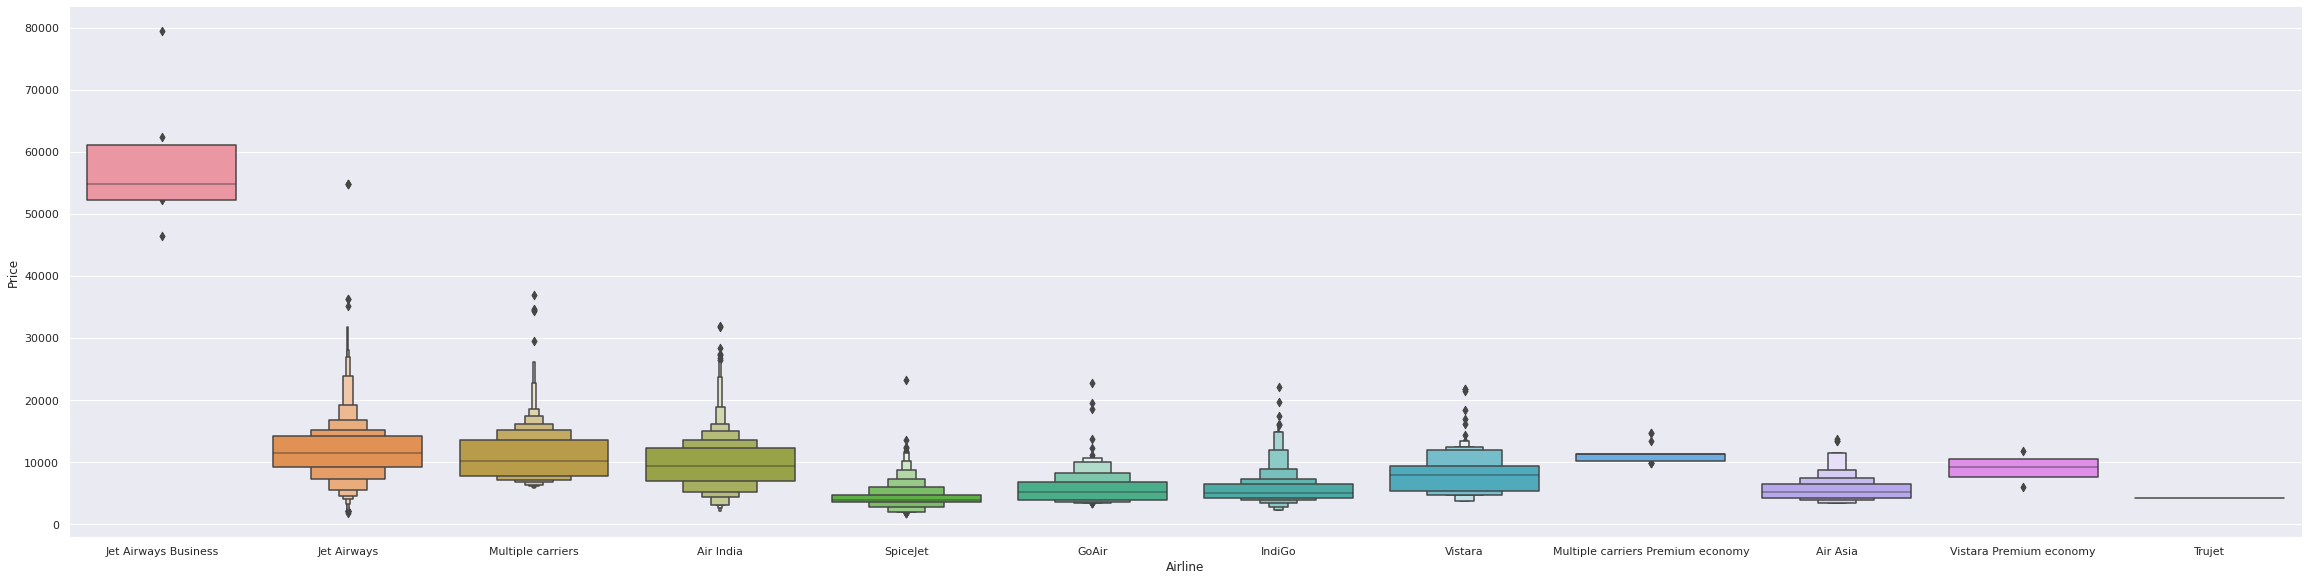

In [31]:
# Now let us find out which airlines have done the highest business
# We will plot all the prices with respect to each airline

# AIRLINE VS PRICE

sns.catplot(y = 'Price' ,x = 'Airline', data = data.sort_values('Price', ascending = False), kind = "boxen", height = 8, aspect = 4)
plt.show

# From the plot below we can see that the jet airways business have the highest price compared to all other airlines

In [32]:
# As the Airline column has nominal Categorical data,we will perform One Hot Encoding

Airline = data[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first = True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [33]:
data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

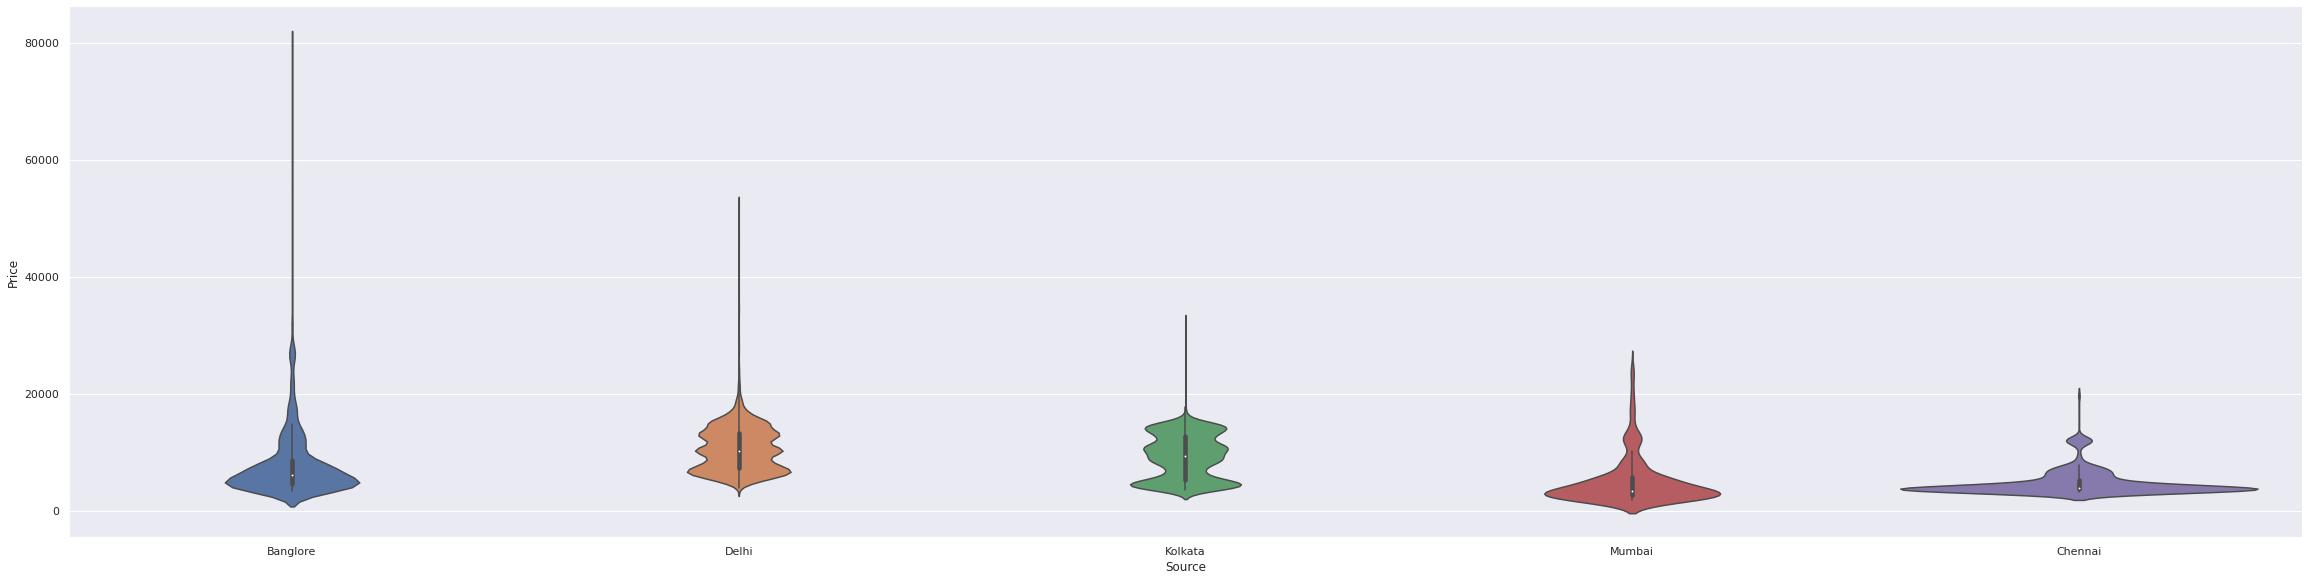

In [34]:
# Source vs Price
sns.catplot( y = "Price", x = "Source", data = data.sort_values("Price", ascending = False), kind = 'violin' , height = 8, aspect = 4)
plt.show()

In [35]:
# Now as we see that the source column is also a nominal categorical data, we wil perform One hot encoding

source = data[["Source"]]
source = pd.get_dummies(source, drop_first = True)
source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [36]:
data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<function matplotlib.pyplot.show>

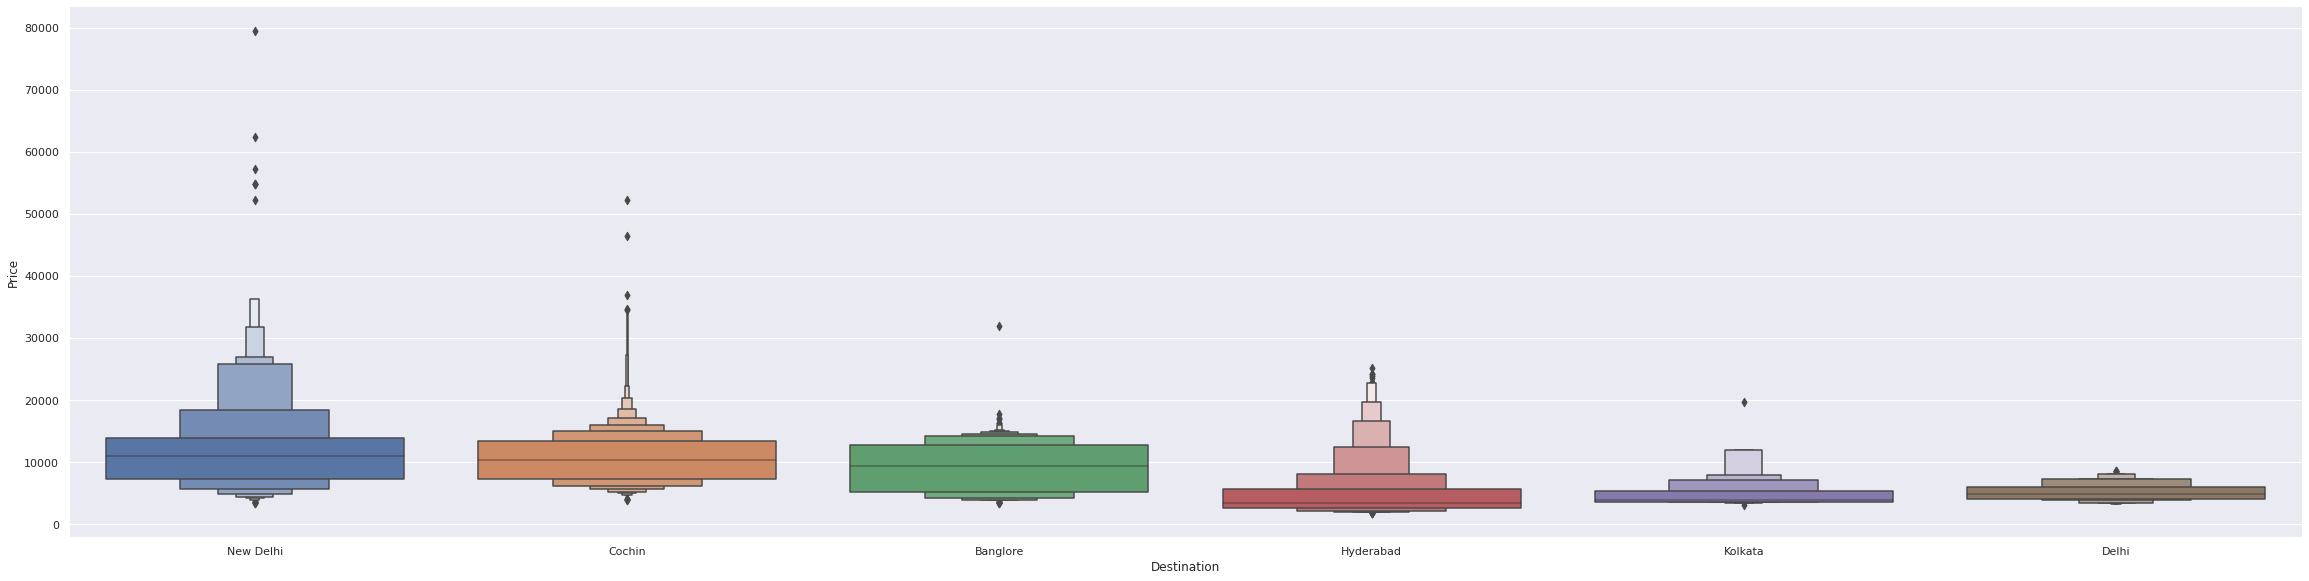

In [37]:
# Destination vs Price
sns.catplot(y = "Price", x = "Destination", data = data.sort_values('Price', ascending = False),kind = "boxen", height = 8, aspect = 4)
plt.show

In [38]:
# as Destination column has  nominal categorical data, we will perform OneHotEncoding

Destination=data[["Destination"]]
Destination= pd.get_dummies(Destination,drop_first=True)
Destination.head()


,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [39]:
data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [40]:
# As the route column and the total_stops gives the same information so will drop the route and additional_info doesn't provide with much information
data.drop(['Route','Additional_Info'], axis = 1, inplace = True)

In [41]:
data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [42]:
# As we notice total_Stops columns provide us the information that in the journey from source to destination how many stops were there in between
# So as this is a Ordinal type of data, we will perform Label Encoding

# Here for each value we will assigned a corresponding key

data.replace({"non-stop":0, "1 stop":1, "2 stops":2, "3 stops":3, "4 stops":4}, inplace = True)
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dept_hour,Dept_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [43]:
# Now the One hot encoding data's which we have retrieved for Airline , Source and Destination we will concatenate it with our original dataframe
# Concatenate dataframe --> data + airline + source + desination

train_data = pd.concat([data,Airline,source,Destination], axis = 1)
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dept_hour,Dept_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [44]:
# Dropping the columns which are not required
train_data.drop(["Airline","Source","Destination"],axis =1, inplace = True)
train_data.head()

,Total_Stops,Price,Journey_day,Journey_month,Dept_hour,Dept_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Loading the TEST DATA

In [45]:
test_data = pd.read_excel('/content/Test_set.xlsx')

In [46]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


## Performing the above feature Engineering on test set data also

In [47]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [48]:
test_data.shape

(2671, 10)

In [49]:
# Preprocessing
print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

In [50]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## Feature Selection


In [51]:
# Now in feature selection step we have to find out the best features which will contribute to the target variable and is highly correlated with it 
# There are some features selection methods like 1) Heat Map, 2) featureimportance, 3) SelectKBest

In [52]:
train_data.columns # These are the columns which are present in our train data

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dept_hour',
       'Dept_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [53]:
# As we want our independent Variable we will make x as our independent variable which hold the features

x = train_data.loc[:,['Total_Stops',  'Journey_day', 'Journey_month', 'Dept_hour',
       'Dept_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

In [54]:
x.head()

,Total_Stops,Journey_day,Journey_month,Dept_hour,Dept_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [55]:
# hence y will be our independent variable which is the price column
y = train_data.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs


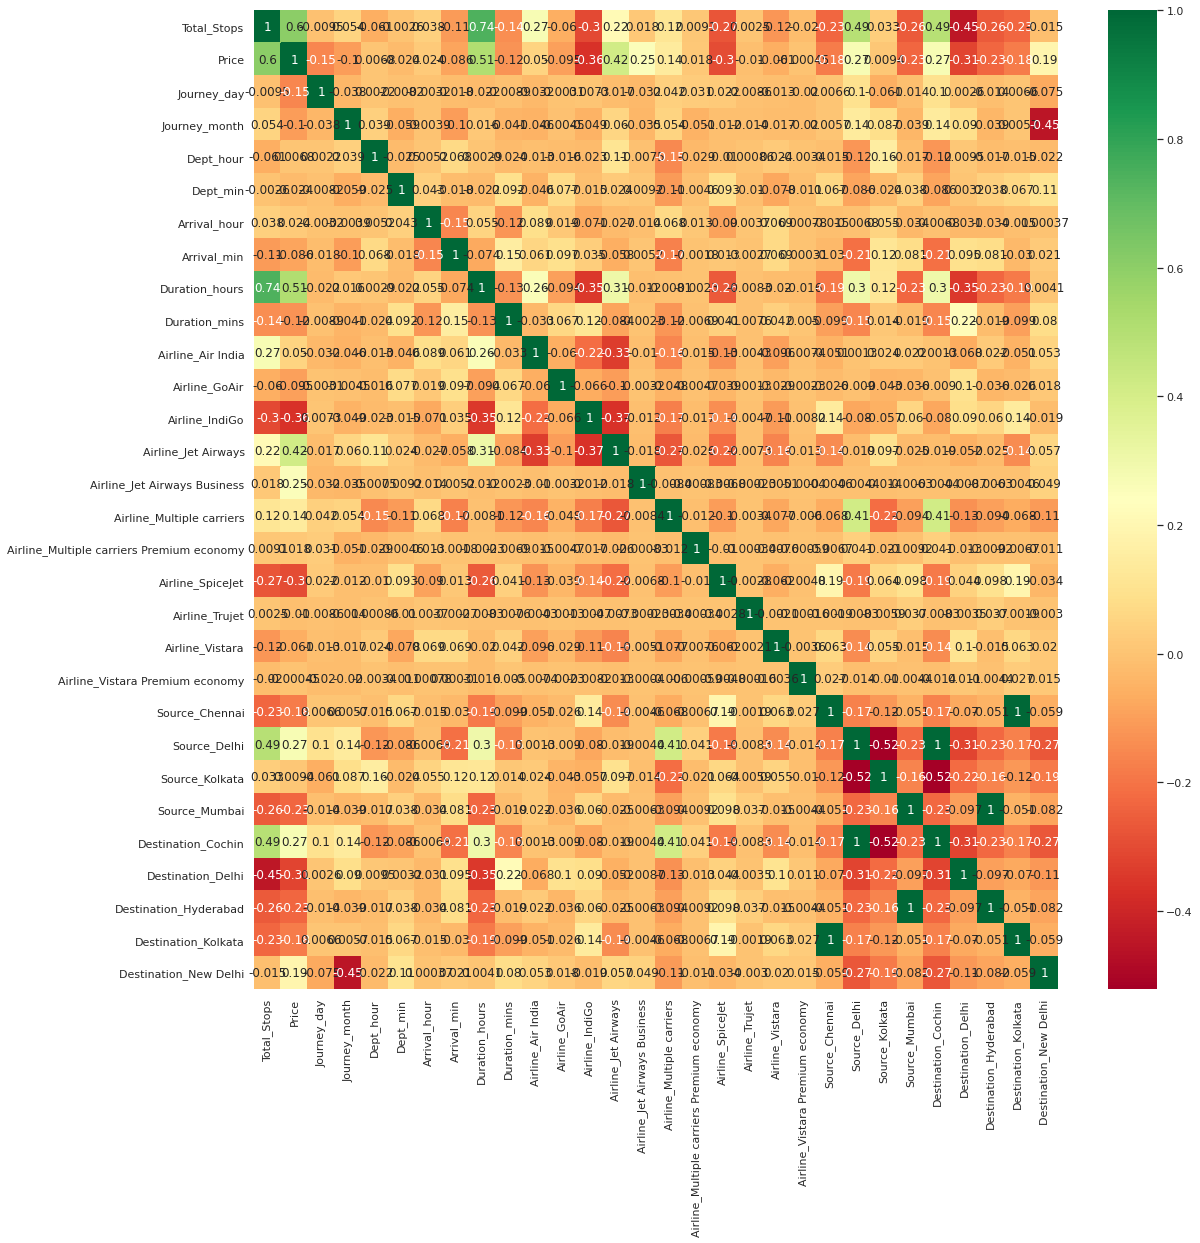

In [56]:
%time
# Now let us plot the correlation between the Independent and Dependent Feature 
# Correlation matrix shows that how each variable is correlated with each other 1 represents highly positive correlated and -1 represented negatively correlated

plt.figure(figsize=(18,18))
sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn')

plt.show()

### In the above matrix plot 
### The correlation showing Extreme green colour means they are highly correlated
### And correlation showing Extreme red colours means they are negatively correlated

### If we observe that there are two independent features which are highly correlated, We can drop any one of them as both the features are doing almost the same task

In [57]:
%time
# Extracting the Important features using ExtraTreesRegressor Function

from sklearn.ensemble import ExtraTreesRegressor

selection = ExtraTreesRegressor()
selection.fit(x,y)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs


ExtraTreesRegressor()

In [58]:
# Looking at important features given by ExtraTreeRegressor
print(selection.feature_importances_)

[2.28248045e-01 1.45719292e-01 5.29090343e-02 2.46204225e-02
 2.09999331e-02 2.73406991e-02 1.86421167e-02 1.12485716e-01
 1.80878943e-02 1.03344484e-02 1.90294370e-03 1.74121501e-02
 1.42610147e-01 6.77854425e-02 1.99824535e-02 8.45951260e-04
 2.87299494e-03 1.10612378e-04 5.23782791e-03 8.69587464e-05
 4.21017629e-04 1.26970328e-02 3.01682150e-03 7.00297823e-03
 1.08308554e-02 1.55602174e-02 6.85473214e-03 5.30754463e-04
 2.48505073e-02]


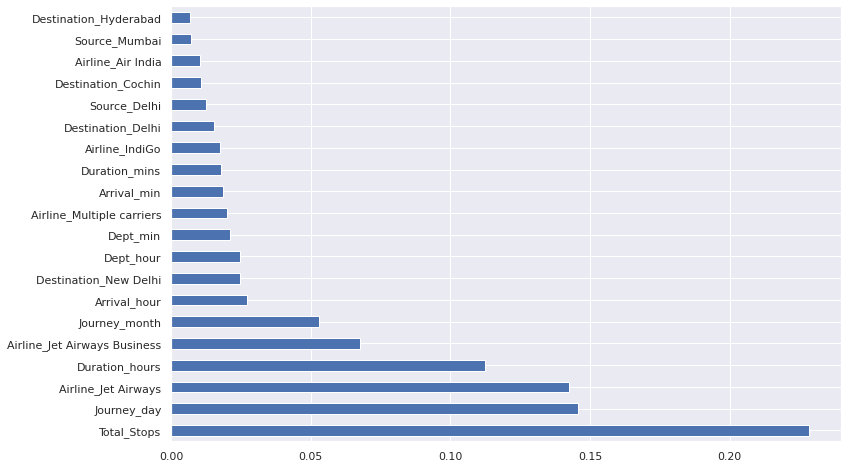

In [59]:
# Now we can understand it better by visualization we will plot all the feature importance

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_ , index = x.columns)
feat_importances.nlargest(20).plot(kind = "barh")
plt.show()

# We will be using Random Forest Model

In [60]:
# Splitting the dataset into train and test set
from sklearn.model_selection import train_test_split

x_train,x_test,y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 12)

In [71]:
%%time
# Importing the RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()

CPU times: user 90 µs, sys: 11 µs, total: 101 µs
Wall time: 106 µs


In [72]:
%%time
# Fitting our training set
rf_reg.fit(x_train,y_train)

CPU times: user 2.23 s, sys: 28.6 ms, total: 2.26 s
Wall time: 2.26 s


RandomForestRegressor()

In [63]:
# Predicting our x_test set

prediction = rf_reg.predict(x_test)

In [64]:
# Checking the Accuracy for training set In regression we check the RMSE score
rf_reg.score(x_train,y_train)

0.9560570316159116

In [65]:
# Checking the Accuracy for test set

rf_reg.score(x_test,y_test)

0.7531756828449475

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show>

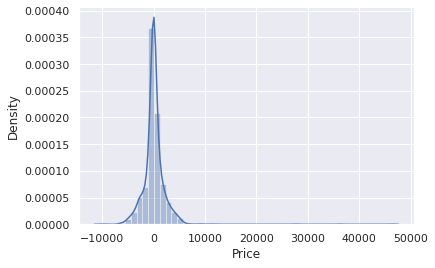

In [66]:
# The below plot shows the gaussian distribution which shows that our prediciton is pretty good
sns.distplot(y_test-prediction)
plt.show

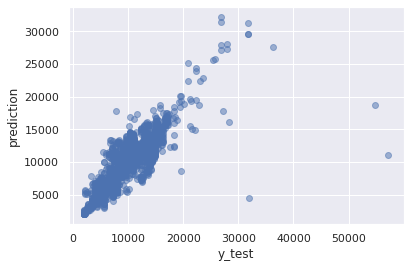

In [67]:
# plotting the scatter plot
plt.scatter(y_test,prediction,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("prediction")
plt.show()

#### The linear distribution which we can absorve in the above scatter plot shows that our predictions are pertty good

In [68]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [69]:
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test,prediction))
print("Mean Sqaured Error: ",metrics.mean_squared_error(y_test,prediction))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(y_test,prediction)))

Mean Absolute Error:  1210.17936868644
Mean Sqaured Error:  5242894.199452496
Root Mean Squared Error:  2289.7367096355197


In [70]:
# Checking the R squared error
metrics.r2_score(y_test,prediction)

0.7531756828449475

# Performing Hyperparameter Tuning

In [ ]:
# There are two technique to perform hyperparameter tuning
# 1) RandomizedSearchCV 2) GridSearchCV
# We use RandomizedSearchCv because it is much faster than GridSearchCv

In [74]:
from sklearn.model_selection import RandomizedSearchCV

In [73]:
%%time
# Randomized Search CV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

CPU times: user 179 µs, sys: 19 µs, total: 198 µs
Wall time: 202 µs


In [75]:
# create random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [76]:

# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf_reg, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [77]:
%%time
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [78]:
# Looking at the best parameters
rf_random.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 700}

In [79]:
# Doing the prediction on x test data
prediction = rf_random.predict(x_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


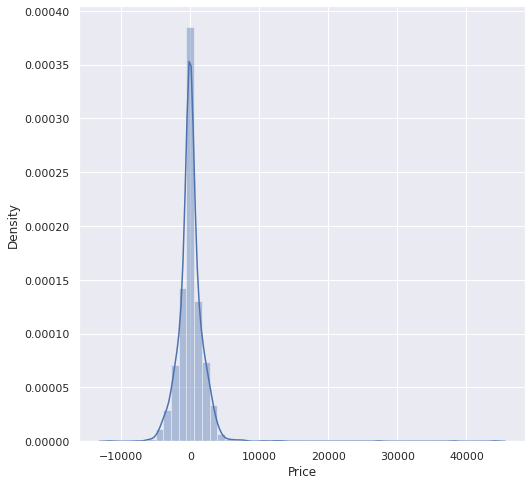

In [80]:

plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
# Below the Gaussian distribution shows our prediction are pretty good

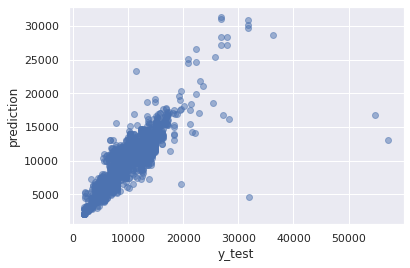

In [81]:
# plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("prediction")
plt.show()

In [82]:
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test,prediction))
print("Mean Sqaured Error: ",metrics.mean_squared_error(y_test,prediction))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(y_test,prediction)))

Mean Absolute Error:  1199.1014887470865
Mean Sqaured Error:  4839764.803480862
Root Mean Squared Error:  2199.9465455962472


In [83]:
# Checking the R squared error

metrics.r2_score(y_test,prediction)

0.772154158110807

### From above we can see that hyperparameter tuning has helped to increase our accuracy by almost 2%

## Saving the model to use it again

In [84]:
import pickle

# Opening a file where we want to store the model
file  = open('Flight_randomforest','wb')

# dumping the information inside that file
pickle.dump(rf_reg,file)

In [85]:
model = open('Flight_randomforest','rb')
forest = pickle.load(model)

In [86]:
y_prediction = forest.predict(x_test)

In [87]:
metrics.r2_score(y_test,y_prediction)

0.7533655986298715

# USING RAPIDS FRAMEWORK TO LOAD THE DATA

# RAPIDS IS A DATA SCIENCE FRAMEWORK DEVELOPED BY NVIDIA. IT IS USED TO SPEED UP MACHINE LEARNING PROCESS.

1. IT WORKS END TO END, IT HELP US TO LOAD THE DATA ON GPU MEMORY AND PERFORM ALL THE PREPROCESSING TASK BY USING THE POWER GPU
2. AND USING RAPIDS WE CAN FIT TRAIN THE DATA USING MACHINE LEARNING ALGORITHMS ON GPU

In [ ]:
# This get the RAPIDS-Colab install files and test check your GPU.  Run this and the next cell only.
# Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/env-check.py

fatal: destination path 'rapidsai-csp-utils' already exists and is not an empty directory.
***********************************************************************
Woo! Your instance has the right kind of GPU, a Tesla T4!
***********************************************************************



In [ ]:
# This will update the Colab environment and restart the kernel.  Don't run the next cell until you see the session crash.
!bash rapidsai-csp-utils/colab/update_gcc.sh
import os
os._exit(00)

Updating your Colab environment.  This will restart your kernel.  Don't Panic!
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [

In [ ]:
# This will install CondaColab.  This will restart your kernel one last time.  Run this cell by itself and only run the next cell once you see the session crash.
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:36
🔁 Restarting kernel...


In [ ]:
# Installing RAPIDS is now 'python rapidsai-csp-utils/colab/install_rapids.py <release> <packages>'
# The <release> options are 'stable' and 'nightly'.  Leaving it blank or adding any other words will default to stable.
# The <packages> option are default blank or 'core'.  By default, we install RAPIDSAI and BlazingSQL.  The 'core' option will install only RAPIDSAI and not include BlazingSQL, 
!python rapidsai-csp-utils/colab/install_rapids.py stable
import os
os.environ['NUMBAPRO_NVVM'] = '/usr/local/cuda/nvvm/lib64/libnvvm.so'
os.environ['NUMBAPRO_LIBDEVICE'] = '/usr/local/cuda/nvvm/libdevice/'
os.environ['CONDA_PREFIX'] = '/usr/local'

Installing RAPIDS Stable 21.06
Starting the RAPIDS+BlazingSQL install on Colab.  This will take about 15 minutes.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - cudatoolkit=11.0
    - gcsfs
    - llvmlite
    - openssl
    - python=3.7
    - rapids-blazing=21.06


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    abseil-cpp-20210324.1      |       h9c3ff4c_0        1015 KB  conda-forge
    aiohttp-3.7.4.post0        |   py37h5e8e339_0         625 KB  conda-forge
    anyio-3.2.1                |   py37h89c1867_0         138 KB  conda-forge
    appdirs-1.4.4              |     pyh9f0ad1d_0      

In [3]:
!pip install cuml

     |████████████████████████████████| 2.0 MB 9.9 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 21.6.1+2.g101fc0fda4 requires cupy-cuda110, which is not installed.


# While working using Rapids we use a library named cudf it is similar to pandas, but the cudf will help us to load our dataset on the GPU memory

In [4]:
!nvidia-smi

Sun Jun 27 07:22:14 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import cudf as gdf

In [88]:
# Now in our x variable we have our preprocessed data but that data was loaded using pandas , so to work with rapids we should convert that into cudf.Dataframe format
cudf_df_train = gdf.DataFrame.from_pandas(x)

In [90]:
# loading our test into into our gpu memory
cudf_df_test = gdf.Series.from_pandas(y)

In [99]:
type(cudf_df_train)

cudf.core.dataframe.DataFrame

In [100]:
cudf_df_train.head()

,Total_Stops,Journey_day,Journey_month,Dept_hour,Dept_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [91]:
# if we notice previously the memory size was 3Mib
# After loading the dataset using Cudf, the dataset was loaded on the Gpu and the memory size also increased to 636 Mib
!nvidia-smi

Sun Jun 27 07:41:10 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P0    27W /  70W |    636MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [93]:
# Just like Sklearn, in Rapids we have a library named Cuml which has all the functions like sklearn
#from sklearn.model_selection import train_test_split
from cuml.model_selection import train_test_split

In [101]:
x_train_gdf,x_test_gdf,y_train_gdf,y_test_gdf = train_test_split(cudf_df_train,cudf_df_test,test_size=0.2, random_state = 12)

In [102]:
print("Number of data points in Train", x_train_gdf.shape)
print("Number of data points in Test", x_test_gdf.shape)


Number of data points in Train (8546, 29)
Number of data points in Test (2136, 29)


In [103]:
from cuml.ensemble import RandomForestRegressor

In [104]:
rf_reg_cuml = RandomForestRegressor()

In [109]:
# We need to train our data in 32-bit data let's convert it to 32-bit
x_train_gdf = x_train_gdf.astype('float32')
x_test_gdf = x_test_gdf.astype('float32')

y_train_gdf = y_train_gdf.astype('float32')
y_test_gdf = y_test_gdf.astype('float32')

In [110]:
%%time
# Fitting our training set which is on gpu
rf_reg_cuml.fit(x_train_gdf,y_train_gdf)

CPU times: user 1.05 s, sys: 173 ms, total: 1.22 s
Wall time: 692 ms


RandomForestRegressor()

In [114]:
%%time
# Predicting our x_test set

prediction_1 = rf_reg_cuml.predict(x_test_gdf)

CPU times: user 497 ms, sys: 126 ms, total: 624 ms
Wall time: 587 ms


In [115]:
prediction_1

0        4447.340332
1        6610.216309
2        3883.052490
3       12636.890625
4        5701.264160
            ...     
2131     6122.266602
2132    10493.965820
2133    12117.915039
2134     4537.402344
2135    14207.709961
Length: 2136, dtype: float32

In [116]:
# Checking the Accuracy for training set In regression we check the RMSE score
rf_reg_cuml.score(x_train_gdf,y_train_gdf)

0.9349888563156128

In [117]:
# Checking the Accuracy for testing set In regression we check the RMSE score
rf_reg_cuml.score(x_test_gdf,y_test_gdf)

0.7940915822982788

In [118]:
from cuml import metrics

In [120]:
# checking the r2 score for the data which was trained on gpu
metrics.r2_score(y_test_gdf,prediction_1)

0.7940915822982788

# From using Above Rapids model and comparing the results with the sklearn module we found out that for same training and testing data the model trained using cuml gave better accuracy score

                     SKLEARN      CUML(RAPIDS)

Training Accuracy     0.9560          0.9349

Testing Accuracy      0.7531          0.7940   

Time To Train         2.26 sec        692 ms